In [43]:
import geopandas as gpd
import os
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import branca
import contextily as ctx

os.chdir("/home/silas/rcp_project/rcp_project/")

figure_dir = "docs/reports/thesis/figures/"

In [3]:
# import flats dataset with duration to nearest recycling point
flats_duration = gpd.read_file(r'./data/derived_data/flats_subset_with_rcp.gpkg')

#import rcp dataset
rcps = gpd.read_file(r'./data/raw_data/geodata_stadt_Zuerich/recycling_sammelstellen/data/stzh.poi_sammelstelle_view.shp')

# convert crs to 3857
flats_duration = flats_duration.to_crs(epsg=4326)
rcps = rcps.to_crs(epsg=4326)


In [ ]:

# Create a base map with additional controls
m = folium.Map(
    location=[47.3769, 8.5417],
    zoom_start=12,
    control_scale=True
)


# Add base tile layers
folium.TileLayer('openstreetmap', name='OpenStreetMap').add_to(m)
folium.TileLayer('cartodbpositron', name='CartoDB Positron').add_to(m)
folium.TileLayer('cartodbdark_matter', name='CartoDB Dark').add_to(m)
folium.TileLayer(
    'https://stamen-tiles-{s}.a.ssl.fastly.net/terrain/{z}/{x}/{y}.jpg',
    name='Stamen Terrain',
    attr='Map tiles by Stamen Design'
).add_to(m)
folium.TileLayer(
    'https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png',
    name='Stamen Toner',
    attr='Map tiles by Stamen Design'
).add_to(m)


# Add tile layer control
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

# Remove NaN values from duration
valid_durations = flats_duration['duration'].dropna()

# Use the existing colormap
colormap = branca.colormap.LinearColormap(
    colors=['green', 'yellow', 'red'],
    vmin=valid_durations.min(),
    vmax=valid_durations.max(),
    caption='Duration to Closest RCP (minutes)'
)

# Create a feature group for recycling points instead of a cluster
recycling_points = folium.FeatureGroup(name='Recycling Points')

# Add recycling points directly to the map
for idx, row in rcps.iterrows():
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        icon=folium.Icon(color='green', icon='recycle', prefix='fa'),
        popup=f"RCP ID: {idx}<br>Address: {row['adresse']}"
    ).add_to(m)
    
# Add flats with duration-based coloring
for idx, row in flats_duration.iterrows():
    if not pd.isna(row['duration']):
        color = colormap(row['duration'])
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=3,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"Duration: {row['duration']:.2f} minutes"
        ).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

# Add a legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 150px; height: 90px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            ">
    &nbsp;<b>Legend</b><br>
    &nbsp;<i class="fa fa-circle fa-1x" style="color:blue"></i>&nbsp; Flats<br>
    &nbsp;<i class="fa fa-recycle fa-1x" style="color:green"></i>&nbsp; Recycling Points<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save and display the map
m.save('./data/plots/map_circles.html')
m

# Interactive heatmap with folium

In [ ]:
# create a heat map with folium

# Create a base map
m = folium.Map(location=[47.3769, 8.5417], zoom_start=12)

# Create a colormap for the duration
colormap = folium.LinearColormap(
    colors=['green', 'yellow', 'red'],
    vmin=flats_duration['duration'].min(),
    vmax=flats_duration['duration'].max()
)
colormap.caption = 'Duration to Closest RCP (minutes)'

# Prepare data for heatmap
heat_data = [[row.geometry.y, row.geometry.x, row['duration']] for idx, row in flats_duration.iterrows() if not pd.isna(row['duration'])]

# Add recycling points to the map
for idx, row in rcps.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        fill=True,
        icon=folium.Icon(color='green', icon='recycle', prefix='fa'),
        fill_opacity=0.7,
        color='red',
        popup=f"RCP ID: {idx}<br>Address: {row['adresse']}"
    ).add_to(m)

# Create and add heatmap to the map
HeatMap(heat_data, min_opacity=0.4, radius=12, blur=14, max_zoom=10, overlay=0.2 ).add_to(m)

# Add a scale bar using MeasureControl
folium.plugins.MeasureControl(position='bottomleft').add_to(m)
# Add a scale bar using MeasureControl
folium.plugins.MeasureControl(position='bottomleft').add_to(m)

# Add a north arrow that moves with the map
# Define north arrow HTML
north_arrow_html = '''
<div style="position: fixed; bottom: 90px; left: 90px; width: 100px; height: 100px; z-index:9999;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ef/North_arrow.svg" style="width:100%; height:100%;">
</div>
'''

m.get_root().html.add_child(folium.Element(north_arrow_html))

# Update legend to remove flat entry
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 150px; height: 60px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            ">
    &nbsp;<b>Legend</b><br>
    &nbsp;<i class="fa fa-recycle fa-2x" style="color:green"></i>&nbsp; Recycling Points<br>
</div>
'''

# Add a legend for the colormap
colormap.add_to(m)
m.get_root().html.add_child(folium.Element(legend_html))

# save the map
m.save('data/plots/heat_map.html')
m


# Static heatmap

NameError: name 'ctx' is not defined

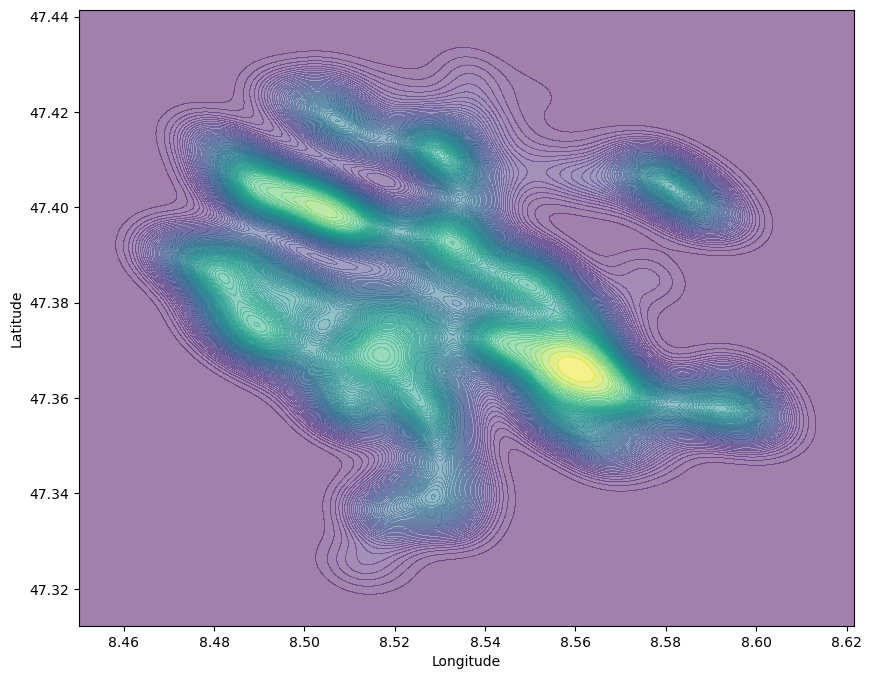

In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a DataFrame for the heatmap
heat_df = pd.DataFrame({
    'Longitude': flats_duration.geometry.x,
    'Latitude': flats_duration.geometry.y,
    'Duration': flats_duration['duration']
})

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap without iso lines
kde = sns.kdeplot(
    data=heat_df,
    x='Longitude',
    y='Latitude',
    weights='Duration',
    cmap='viridis', 
    fill=True,
    thresh=0,
    levels=100,
    alpha=0.5,
    ax=ax
)

# Add the basemap
ctx.add_basemap(
    ax,
    crs=flats_duration.crs.to_string(),
    source=ctx.providers.OpenStreetMap.Mapnik
)

# Plot the RCPs
rcps.plot(
    ax=ax,
    color='green',
    markersize=50,
    label='Recycling Collection Points'
)

# Add a colorbar
norm = plt.Normalize(vmin=heat_df['Duration'].min(), vmax=heat_df['Duration'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', label='Duration to Closest RCP (minutes)')

# Set titles and labels
ax.set_title('Heatmap of Duration to Closest Recycling Collection Point')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Save and show the figure
plt.savefig(figure_dir + 'static_heatmap_with_basemap.png', dpi=300)
plt.show()